Import packages

In [70]:
import sys
sys.path.append('../helpers/')

from pathlib import Path
import numpy as np
import os
from glob import glob
import natsort
import cv2
import csv

import matplotlib.pyplot as plt

# importing packages
from preprocessing import Preprocessing
from feature_extraction import FeatureExtraction

preprocessor = Preprocessing()
feature_extractor = FeatureExtraction()

# To allow auto reload to this notebook after modifying any external file imported
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Read the images

In [14]:
# SAVE_PATH = Path("Processed-Heart-Detection")
# dcm_path = ROOT_PATH/str(patient_id) # joining paths
# dcm_path = dcm_path.with_suffix(".dcm") # adds suffix

ROOT_PATH = Path(Path(os.getcwd())/"../challenge1")
TRAIN_PATH = ROOT_PATH/"train"
VAL_PATH = ROOT_PATH/"val"

print(TRAIN_PATH)

c:\Users\abdal\Documents\Master\EMJMD MAIA\SEMESTER 3 - UdG\CAD\Melanoma-classification-using-machine-learning\notebooks\..\challenge1\train


In [15]:
train_nevus = sorted(glob(str(TRAIN_PATH/'nevus/*')))
train_others = sorted(glob(str(TRAIN_PATH/'others/*')))

In [16]:
# train_nevus

# TODO ASK:
# Do we normalize the images in pre-processing or after we extract all of the features?
# Should we remove the hair? Aggressivly? 
# Should we fill the borders?

Finished


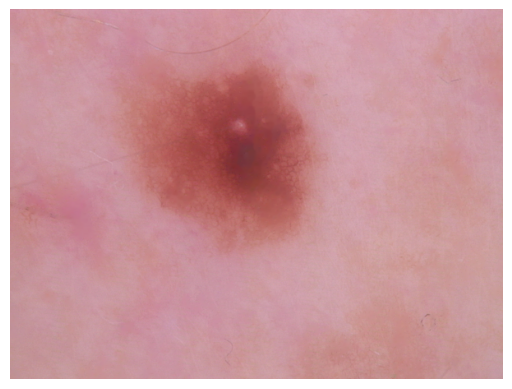

In [72]:
# Pre-processing

features_dir = r'../output/features/'
csv_filename = '2_features.csv'

def display_img(image, gray=False):
    if gray:
        plt.imshow(image, cmap='gray')
    else:
        # plt.imshow(image)
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')

with open(os.path.join(features_dir, csv_filename), 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)

    for index, image_path in enumerate(train_nevus):

        # reading the image 
        image = cv2.imread(image_path,cv2.IMREAD_COLOR)

        # 1. Copping black frame
        image_without_black_frame, _ = preprocessor.crop_frame(image)

        # 2. Resizing
        image_resized = preprocessor.resize_images(image_without_black_frame, preserve_ratio=True)

        # 3. Removing hair
        image_without_hair = preprocessor.extract_hair(image_resized)

        # 4. Displaying result
        display_img(image_without_hair)
        
        # 5. Extracting features
        feature_vector = feature_extractor.extract_color_features(image)

        # print(feature_vector)
        writer.writerow(feature_vector)
        
        

        if index == 4:
            print("Finished")
            break





In [ ]:
# Image augmentation
# 1. Create dataset class (DL)
# 2. pass the augmentation as an argument (create class/file)